<a href="https://colab.research.google.com/github/ChanceDurr/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Chance_Dare_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',
                names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
                       'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])
print(df.shape) # Check to see the correct amount of observations
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [90]:
# Check for missing values in A16
df['A16'].value_counts(dropna=False)

-    383
+    307
Name: A16, dtype: int64

In [91]:
# Replace + and - with 1 and 0
df['A16'] = df['A16'].replace({'+': 1, '-': 0})
df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,1
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,1
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,1
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,1
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,1
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,1


In [92]:
df = df.replace({'?': None}) #Replace ? with NaN
df['A2'] = df['A2'].astype(float) # Change the dtype of A2 to float
df['A2'].describe()

count    678.000000
mean      31.568171
std       11.957862
min       13.750000
25%       22.602500
50%       28.460000
75%       38.230000
max       80.250000
Name: A2, dtype: float64

In [93]:
df_approved = df[df['A16'] == 1]
df_rejected = df[df['A16'] == 0]
print(df_approved.shape)
df_approved.head(10)

(307, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,1
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,1
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,1
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,1
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,1
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,1


In [94]:
print(df_rejected.shape)
df_rejected.head(10)

(383, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.500,u,g,e,bb,1.585,t,f,0,t,s,00420,0,0
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,None,0,0
72,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,00980,0,0
73,b,44.25,0.500,u,g,m,v,10.750,t,f,0,f,s,00400,0,0
74,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,00160,2,0
75,b,20.67,5.290,u,g,q,v,0.375,t,t,1,f,g,00160,0,0
76,b,34.08,6.500,u,g,aa,v,0.125,t,f,0,t,g,00443,0,0
77,a,19.17,0.585,y,p,aa,v,0.585,t,f,0,t,g,00160,0,0
78,b,21.67,1.165,y,p,k,v,2.500,t,t,1,f,g,00180,20,0
79,b,21.50,9.750,u,g,c,v,0.250,t,f,0,f,g,00140,0,0


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [95]:
# ttest_ind to see if means are similar, reject null hypothesis
ttest_ind(df_approved['A2'].dropna(), df_rejected['A2'].dropna())

Ttest_indResult(statistic=4.2922156166315535, pvalue=2.027663707178064e-05)

In [96]:
# ttest_ind to see if means are similar, reject null hypothesis
ttest_ind(df_approved['A8'].dropna(), df_rejected['A8'].dropna())

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

In [104]:
ct1 = pd.crosstab(df['A16'], df['A1'])
chi_statistic1, p_value1, dof1, table1 = chi2_contingency(ct1)
print(f'Chi test statistic: {chi_statistic1}')
print(f'P Value: {p_value1}')
print(f'Degrees of freedom: {dof1}')
print(f'Expected Table: \n {table1}')

Chi test statistic: 0.3112832649161994
P Value: 0.5768937883001118
Degrees of freedom: 1
Expected Table: 
 [[115.84070796 258.15929204]
 [ 94.15929204 209.84070796]]


In [106]:
ct2 = pd.crosstab(df['A16'], df['A4'])
chi_statistic2, p_value2, dof2, table2 = chi2_contingency(ct2)
print(f'Chi test statistic: {chi_statistic2}')
print(f'P Value: {p_value2}')
print(f'Degrees of freedom: {dof2}')
print(f'Expected Table: \n {table2}')
ct2

Chi test statistic: 26.234074966202144
P Value: 2.010680204180363e-06
Degrees of freedom: 2
Expected Table: 
 [[  1.11403509 289.09210526  90.79385965]
 [  0.88596491 229.90789474  72.20614035]]


A4,l,u,y
A16,,,
0,0,263,118
1,2,256,45


## Exploration with Visuals


([<matplotlib.axis.YTick at 0x7fcf35e63b38>,
 <a list of 2 Text yticklabel objects>)

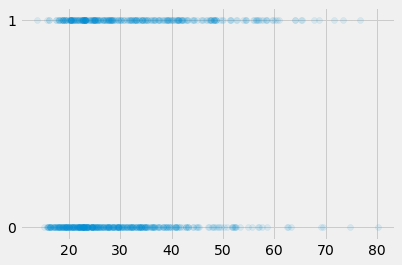

In [116]:
plt.style.use('fivethirtyeight')
plt.scatter(df['A2'], df['A16'], alpha=.1)
plt.yticks([0, 1])

([<matplotlib.axis.YTick at 0x7fcf35b99780>,
 <a list of 2 Text yticklabel objects>)

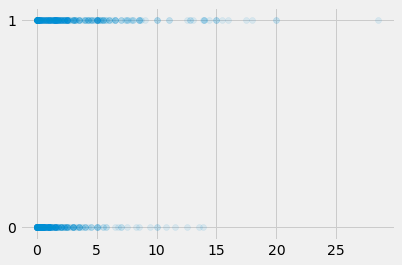

In [118]:
plt.style.use('fivethirtyeight')
plt.scatter(df['A8'], df['A16'], alpha=.1)
plt.yticks([0, 1])

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

In both ttests you can see that we were able to reject the null hypothesis that the two means of the features(A2 and A8) are not the same. Therefore, we should be able to say that there is a correlation between the features and having an effect on whether or not they get approved for credit. If we Failed to Reject the null, I would say that there isn't a significant correlation between the A2, and A8 features and getting approved for credit.

With the two Chi sqaured test, I wanted to see if there was a dependency with one of the other categorical features and whether or not they got approved for credit. You can see in one of the cases that we Rejected the Null hypothesis of them being independant of each other. Therefore we can say that there is a correlation between the two features. On the other hand, we had a case where we Fail to Reject the Null hypothesis. Meaning that we cannot say that these are dependent on each other.

I would say the most challenging part of this Sprint challenge was preparing for it. It was tough to get a grasp of what were doing and why we were doing it. After a full day of study though with some peers and Ryan himself. I was able to go through step by step and get some questions answered. After that,  it was a lot easier to understand. However, I still dont know why there is a higher chance with door 2 in the monty hall problem :)